## Importing Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import classification_report, accuracy_score

## Loading and Preprocessing the Dataset

In [2]:
DATA_PATH = './TESS Toronto emotional speech set data'  # Path to TESS dataset

def extract_features(file_path, max_len=216000):
    audio, sample_rate = librosa.load(file_path)
    if len(audio) < max_len:
        audio = np.pad(audio, (0, max_len - len(audio)), mode='constant')
    else:
        audio = audio[:max_len]

    # Extracting MFCC features
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs = np.mean(mfccs.T, axis=0)

    return mfccs

In [3]:
# Loop over files and extract features
emotion_labels = []
features = []

for folder in os.listdir(DATA_PATH):
    folder_path = os.path.join(DATA_PATH, folder)
    # Check if current item is a directory and not the parent directory
    if os.path.isdir(folder_path) and folder != os.path.basename(DATA_PATH):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            feature = extract_features(file_path)
            features.append(feature)
            emotion_labels.append(folder.split('_')[-1].lower())  # Extract emotion label from folder name

# Convert to DataFrame
df = pd.DataFrame(features)
df['emotion'] = emotion_labels

In [4]:
df['emotion'].unique()

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad',
       'surprised'], dtype=object)

In [5]:
df['emotion'] = df['emotion'].replace('surprised','surprise')

In [6]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-573.231567,8.344155,-2.780707,-1.860145,-0.732571,1.207681,-3.967757,-1.088819,-1.588332,-0.502856,...,0.908792,1.417375,1.006114,0.353054,-0.354103,0.460309,1.401407,0.280231,-0.297650,angry
1,-654.113464,10.933579,-0.381045,-3.345497,-1.679429,1.791179,-1.514576,-0.173761,-2.021596,0.523368,...,1.957557,1.721298,0.462296,-0.093947,-0.598738,0.384984,1.609181,0.394646,0.040918,angry
2,-597.014221,4.211325,-0.760140,-0.013426,-0.130690,0.145909,-3.029307,-0.385222,-2.087316,-0.138440,...,1.688679,1.489420,-0.344504,-0.584651,0.302071,0.359291,1.205243,-0.230824,-0.448570,angry
3,-570.304749,8.697978,-1.905161,-2.310101,-0.639894,1.138400,-3.590364,-1.266126,-2.199064,-0.517918,...,1.407061,1.213907,1.013532,0.485404,0.155513,0.519386,1.254492,0.616457,0.559833,angry
4,-607.471924,7.703933,0.641928,1.351061,0.613034,0.129575,-3.481271,1.082902,-2.831280,-1.816543,...,0.988509,0.207713,-0.057722,-0.100306,0.110810,0.277015,0.354644,-0.406089,-0.184251,angry
5,-628.245789,7.872582,-0.715718,-0.086498,1.134971,0.560717,-4.128131,-0.520518,-1.623482,-0.696337,...,1.610297,1.147512,0.981040,0.663113,0.213435,0.244121,1.159373,0.517769,0.991196,angry
6,-599.404297,7.763792,-1.786114,-0.182385,-0.694234,-0.193524,-3.475924,0.194668,-1.915171,-0.117511,...,0.777895,0.178549,-0.208163,0.773405,0.327326,0.074117,0.085967,-0.255037,0.243054,angry
7,-629.121399,10.316868,1.349914,-1.072549,-1.358860,0.049302,-2.349235,0.109379,-2.606013,-0.885612,...,0.849921,1.040062,0.270486,0.702107,-0.183377,-0.092824,1.273679,0.090836,0.176948,angry
8,-575.991272,10.290846,3.158916,-0.086510,-2.885116,-0.471903,-1.926560,0.364010,-3.436277,0.256139,...,1.210570,1.192479,0.788098,1.185362,0.349989,-0.020929,1.840014,-0.062133,0.444532,angry
9,-605.272217,6.993153,-0.885353,-2.221854,-1.377908,1.089055,-2.729895,-0.514589,-2.765399,-0.733046,...,1.153950,0.316486,-0.293939,0.353994,0.607497,0.006211,0.573338,-0.373196,0.318810,angry


## Preparing Dataset for the model

In [7]:
# Encoding the labels
label_encoder = LabelEncoder()
df['emotion'] = label_encoder.fit_transform(df['emotion'])

# Splitting data into train and test sets
X = df.drop('emotion', axis=1).values
y = df['emotion'].values
y = to_categorical(y)  # One-hot encoding

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## Creating Model

In [9]:
model = Sequential([
    LSTM(256,return_sequences=False, input_shape=(40,1)),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(7,activation='softmax')
])

C:\Users\Akash Sharma\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs = 30, batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 216ms/step - accuracy: 0.2301 - loss: 1.8708 - val_accuracy: 0.5446 - val_loss: 1.1767
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.5103 - loss: 1.2556 - val_accuracy: 0.7643 - val_loss: 0.5854
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.6867 - loss: 0.8277 - val_accuracy: 0.8643 - val_loss: 0.3534
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.8319 - loss: 0.5111 - val_accuracy: 0.8446 - val_loss: 0.4208
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.8312 - loss: 0.5760 - val_accuracy: 0.8946 - val_loss: 0.3062
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.8683 - loss: 0.3928 - val_accuracy: 0.9339 - val_loss: 0.1915
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.9053 - loss: 0.2832 - val_accuracy: 0.9321 - val_loss: 0.2340
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - accuracy: 0.9205 - loss: 0.2836 - val_accuracy: 0

## Evaluation of the model

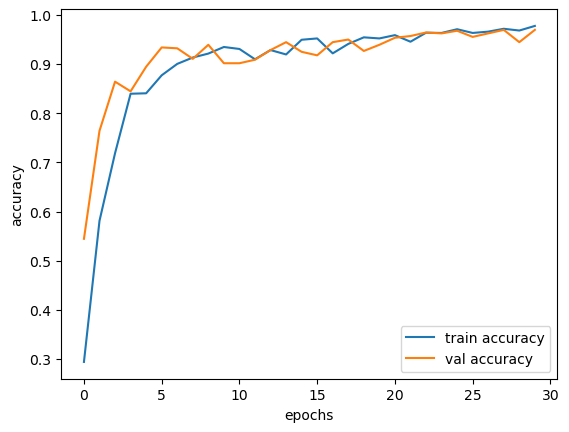

In [13]:
epochs =list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

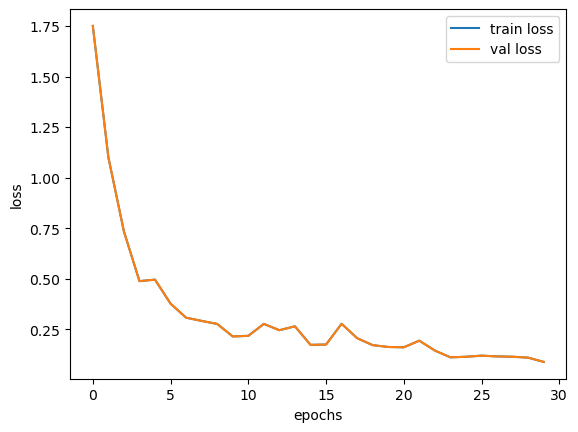

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss, label='train loss')
plt.plot(epochs,loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis=1)
y_val_classes = np.argmax(y_test,axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step


In [17]:
from tensorflow.math import confusion_matrix
conf_matrix = confusion_matrix(y_val_classes,y_pred_classes)
print("Confusion Matrix :")
print(conf_matrix)
target_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad']
print("Classification Report :")
print(classification_report(y_val_classes, y_pred_classes, target_names=target_names))

Confusion Matrix :
tf.Tensor(
[[68  0  1  3  0  0  2]
 [ 0 78  0  0  0  0  0]
 [ 0  0 89  0  0  0  0]
 [ 0  0  4 70  0  0  3]
 [ 0  0  0  0 73  0  0]
 [ 0  1  0  0  0 80  1]
 [ 0  1  0  1  0  0 85]], shape=(7, 7), dtype=int32)
Classification Report :
              precision    recall  f1-score   support

       angry       1.00      0.92      0.96        74
     disgust       0.97      1.00      0.99        78
        fear       0.95      1.00      0.97        89
       happy       0.95      0.91      0.93        77
     neutral       1.00      1.00      1.00        73
    surprise       1.00      0.98      0.99        82
         sad       0.93      0.98      0.96        87

    accuracy                           0.97       560
   macro avg       0.97      0.97      0.97       560
weighted avg       0.97      0.97      0.97       560



## Saving the model

In [18]:
model.save('speech_emotion_recognition_model.h5')